In [27]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=200

In [29]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "real_data",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1786 files belonging to 6 classes.


In [30]:
class_names = dataset.class_names
class_names

['Alexandra Daddario',
 'Anne Hathaway',
 'Chris Evans',
 'Cristiano Ronaldo',
 'Elizabeth Olsen',
 'Tobey Maguire']

In [31]:
len(dataset)

56

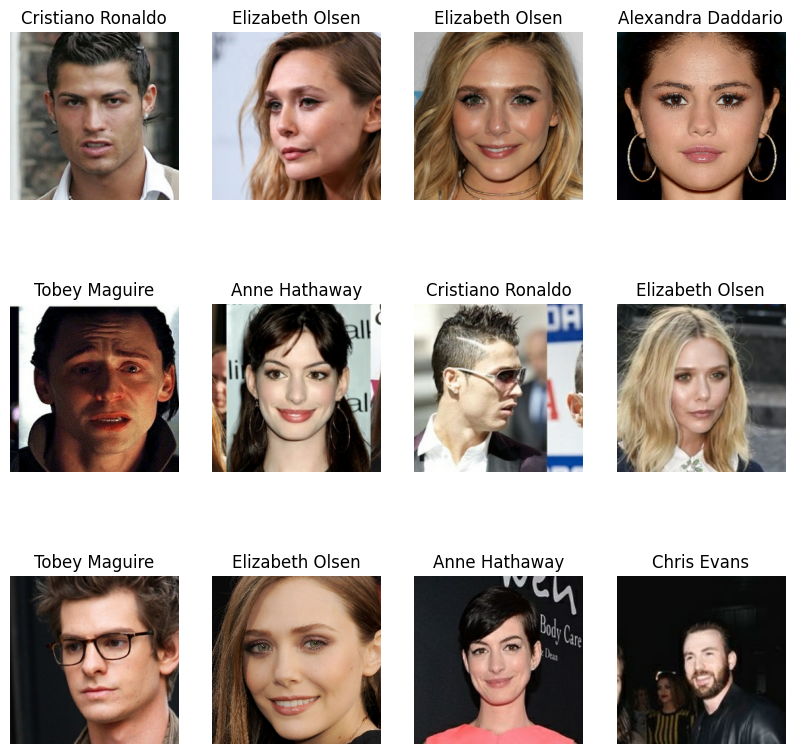

In [32]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [33]:
train_size= 0.8

In [34]:
len(dataset)*0.8

44.800000000000004

In [35]:
train_ds = dataset.take(44)
len(train_ds)

44

In [36]:
test_ds = dataset.skip(44)
len(test_ds)

12

In [37]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [38]:
test_ds=test_ds.skip(6)

In [39]:
len(test_ds)

6

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch    (buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [42]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [43]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 256, 256, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 128, 128, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 128, 128, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 64, 64, 128)        0         
 2D)                                                  

In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=200,
)

Epoch 1/200
44/44 [==============================] - 15s 133ms/step - loss: 1.8475 - accuracy: 0.1619 - val_loss: 1.7806 - val_accuracy: 0.2083
Epoch 2/200
44/44 [==============================] - 5s 108ms/step - loss: 1.8074 - accuracy: 0.1726 - val_loss: 1.8034 - val_accuracy: 0.1406
Epoch 3/200
44/44 [==============================] - 5s 109ms/step - loss: 1.8048 - accuracy: 0.1768 - val_loss: 1.7814 - val_accuracy: 0.2083
Epoch 4/200
44/44 [==============================] - 5s 109ms/step - loss: 1.7885 - accuracy: 0.1797 - val_loss: 1.7735 - val_accuracy: 0.2031
Epoch 5/200
44/44 [==============================] - 5s 108ms/step - loss: 1.7677 - accuracy: 0.2166 - val_loss: 1.7451 - val_accuracy: 0.1927
Epoch 6/200
44/44 [==============================] - 5s 109ms/step - loss: 1.7224 - accuracy: 0.2457 - val_loss: 1.6917 - val_accuracy: 0.2500
Epoch 7/200
44/44 [==============================] - 5s 110ms/step - loss: 1.6631 - accuracy: 0.2685 - val_loss: 1.6498 - val_accuracy: 0.265

In [47]:
scores= model.evaluate(test_ds)


6/6 [==============================] - 2s 109ms/step - loss: 0.7967 - accuracy: 0.8602


In [48]:
scores


[0.796742856502533, 0.8602150678634644]

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 200, 'steps': 44}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss= history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

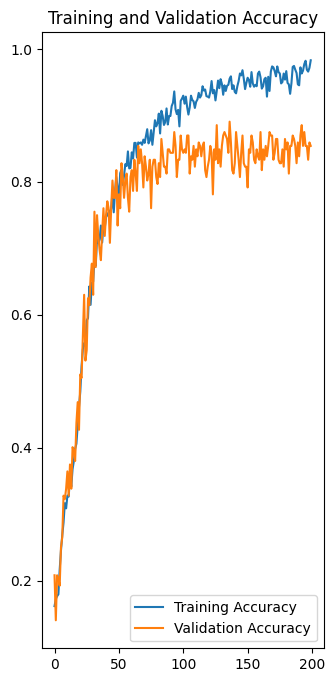

In [53]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

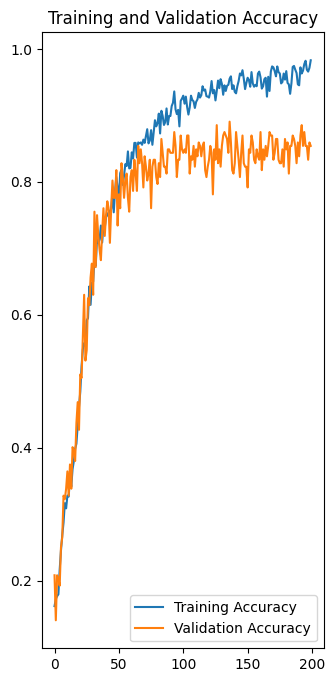

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

In [55]:
scores= model.evaluate(test_ds)

6/6 [==============================] - 1s 39ms/step - loss: 0.7967 - accuracy: 0.8602


In [56]:


acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss= history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

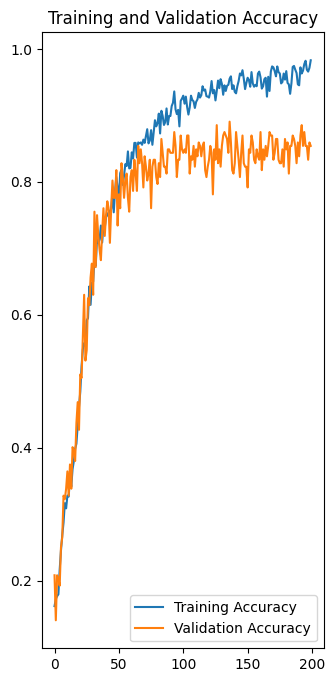

In [57]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

first image to predict
first image's actual label: Elizabeth Olsen
predicted label: Elizabeth Olsen


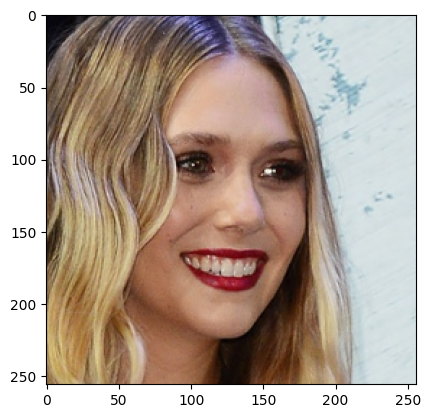

In [58]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [59]:
import cv2
import matplotlib.pyplot as plt

In [60]:
img = cv2.imread("./image_70240.jpg")


In [42]:
plt.imshow(img[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [43]:
label = model.predict(img)
print("predicted label:" ,class_names[np.argmax(label)])

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [ ]:
img_batch = np.expand_dims(img, 0)
predictions = model.predict(img_batch)
predicted_class = class_names[np.argmax(predictions[0])]

In [44]:
print(predicted_class)

NameError: name 'predicted_class' is not defined

In [45]:
plt.imshow(img[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [46]:
img=img/255.0

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [47]:
plt.imshow(img[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [48]:
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

# Chuẩn hóa dữ liệu của ảnh
img = img / 255.0


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [49]:
plt.imshow(img[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [50]:
img_batch = np.expand_dims(img, 0)
predictions = model.predict(img_batch)
predicted_class = class_names[np.argmax(predictions[0])]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

In [51]:
print(predicted_class)

NameError: name 'predicted_class' is not defined

In [52]:
img = img * 255.0

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [53]:
plt.imshow(img[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [54]:
Hien = cv2.imread("./image_5240.jpg")
plt.imshow(Hien[:,:,::-1])

TypeError: 'NoneType' object is not subscriptable

In [55]:
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

# Chuẩn hóa dữ liệu của ảnh
img = img / 255.0

# Mở rộng số chiều của ảnh để phù hợp với số chiều đầu vào của mô hình
img = np.expand_dims(img, axis=0)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [56]:
print("Kích thước của ảnh sau khi chuẩn bị:", img.shape)


AttributeError: 'NoneType' object has no attribute 'shape'

In [57]:
predictions = model.predict(img)

# Chuyển kết quả dự đoán thành dạng nhãn
predicted_class = np.argmax(predictions)

# In kết quả dự đoán
print("Nhãn dự đoán:", class_names[predicted_class])

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [64]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #creat a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

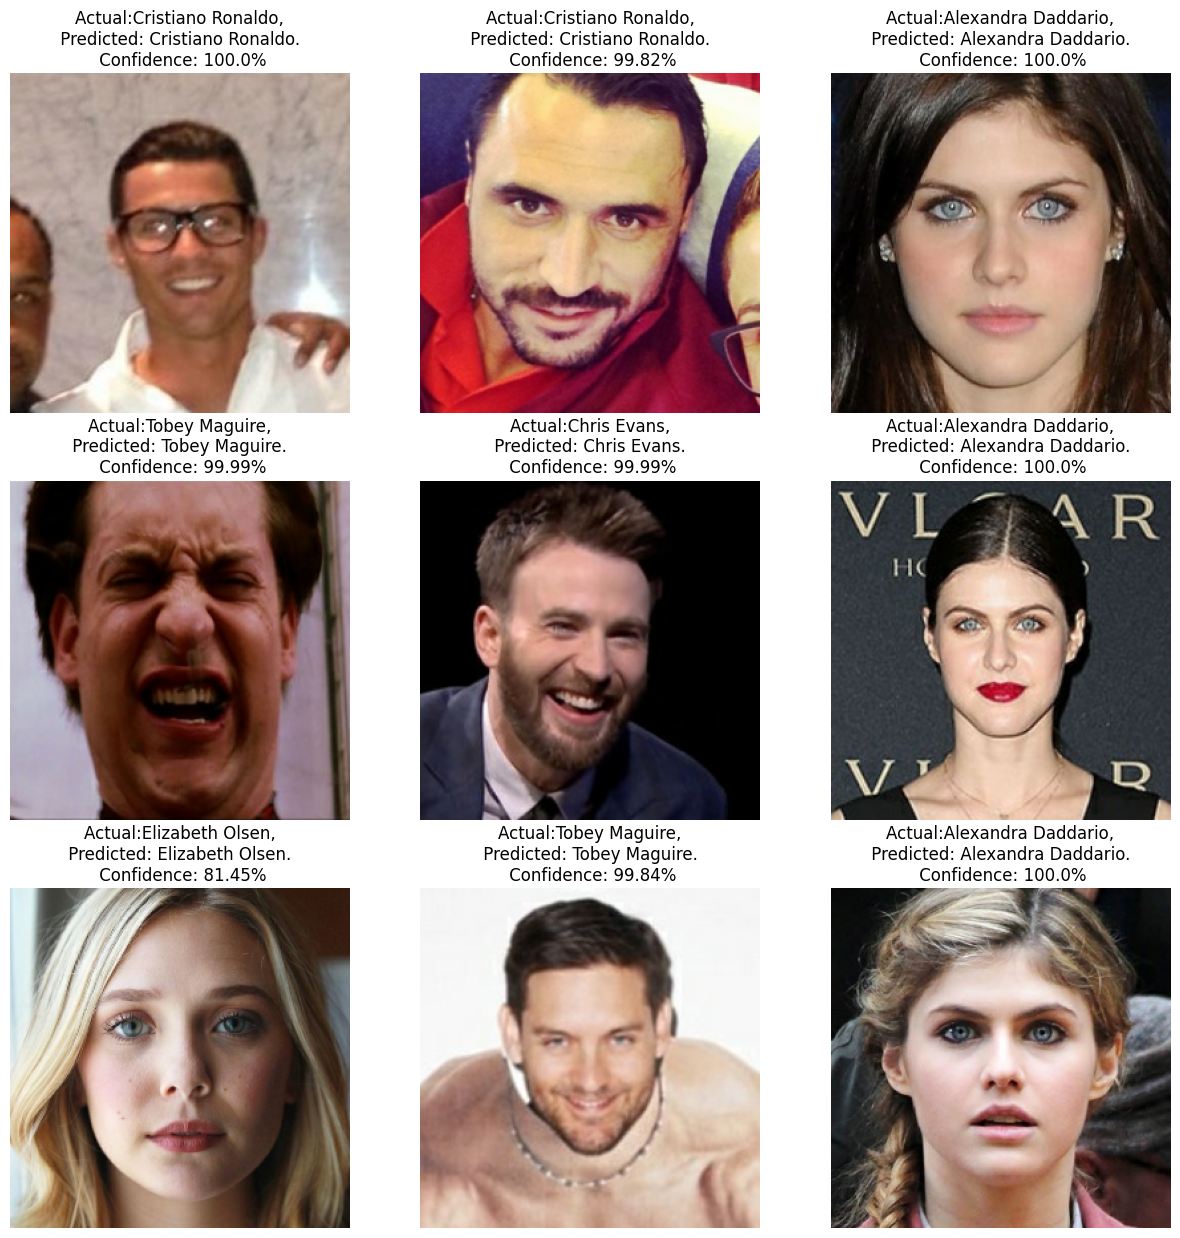

In [70]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [60]:
predict(model,Hien)

ValueError: Unsupported image shape: ()

In [ ]:
Hien2 = cv2.imread("image_5240.jpg")

In [ ]:
Hien2.shape

In [ ]:
Hien2 = cv2.resize(Hien2, (IMAGE_SIZE, IMAGE_SIZE))

In [ ]:
plt.imshow(Hien2[:,:,::-1])

In [61]:
Hien2.shape

NameError: name 'Hien2' is not defined

In [62]:
predict(model,Hien2)

NameError: name 'Hien2' is not defined

In [63]:
Hien3 = cv2.imread("image_10.jpg")

In [64]:
Hien3 = cv2.resize(Hien3, (IMAGE_SIZE, IMAGE_SIZE))

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [65]:
predict(model,Hien3)

ValueError: Unsupported image shape: ()

In [93]:
tesst = dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 11 files belonging to 1 classes.


In [94]:
test_class_name = tesst.class_names

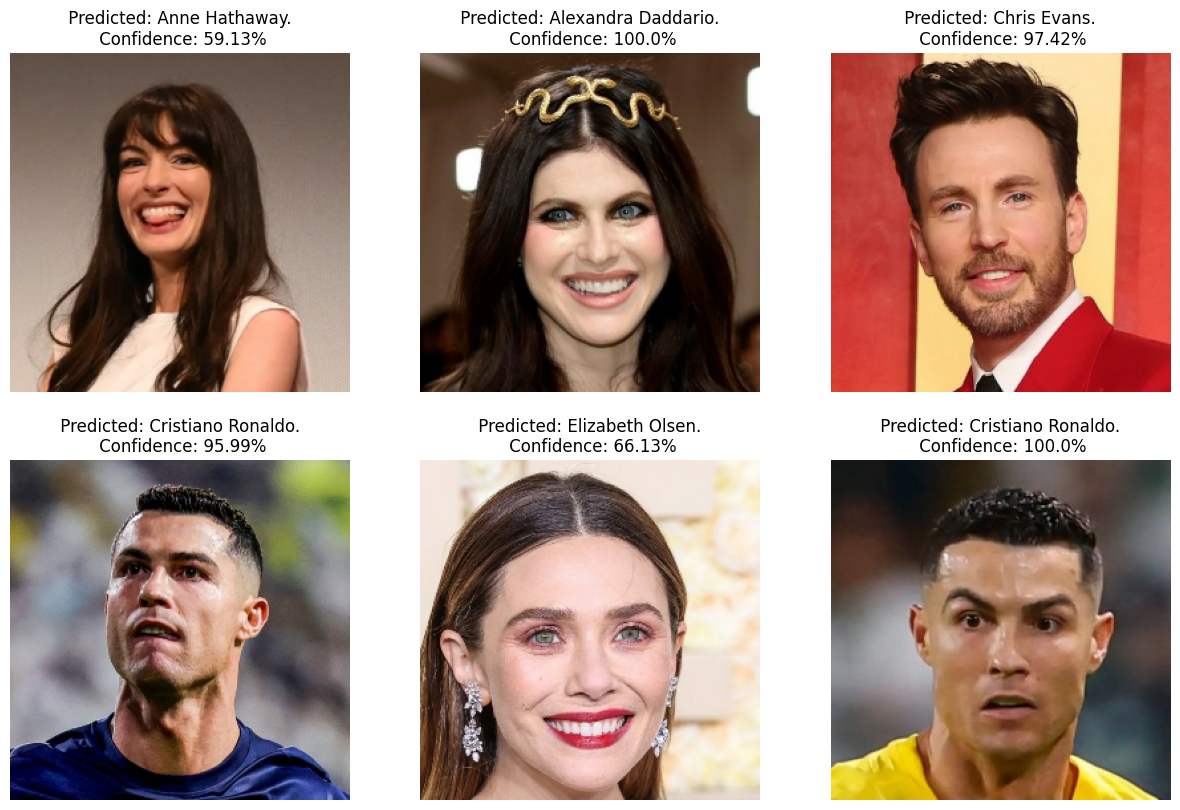

In [95]:
plt.figure(figsize=(15,15))
for images, labels in tesst.take(1):
    for i in range(6):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [47]:
import cv2

# Đọc vào ảnh
img = cv2.imread("Thanh.jpg")

# Resize ảnh về kích cỡ 640x480
resized_img = cv2.resize(img, (640, 480))

# Lưu ảnh đã resize
cv2.imwrite("Thanh.jpg", resized_img)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [78]:
import os
model_version=max([int(i) for i in os.listdir("./saved_model")+[0]])+1
model.save(f"./saved_model/{model_version}")

INFO:tensorflow:Assets written to: ./saved_model/1\assets
